In [107]:
import numpy as np
import scipy.stats
import pandas as pd


%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, expon, kstest, probplot, poisson, binom, gamma
from scipy.stats import t

In [108]:
# Import data excel nyc rolling sales
data = pd.read_csv("nyc-rolling-sales.csv")
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [109]:
# Mengganti '-' dengan NaN
data = data.replace(' -  ', np.nan)
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Menghitung Mean, Median, Modus, Range, Varians, Standar Deviasi

In [110]:
# Convert to float
data['SALE PRICE'] = data['SALE PRICE'].astype(float)

# Menghitung mean dan median
mean = data['SALE PRICE'].mean()
median = data['SALE PRICE'].median()

# Menghitung modus
mode = data['SALE PRICE'].mode()[0]

# Menghitung range
range = data['SALE PRICE'].max() - data['SALE PRICE'].min()

# Menghitung varians
varians = data['SALE PRICE'].var()

# Calculate standard deviation
std_dev = data['SALE PRICE'].std()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Range: ", range)
print("Variance: ", varians)
print("Standard Deviation: ", std_dev)

Mean:  1276456.4977638705
Median:  530000.0
Mode:  0.0
Range:  2210000000.0
Variance:  130079849507240.9
Standard Deviation:  11405255.345990326


## Membuat plot histogram dari variabel "SALE PRICE" dan membuat beberapa plot untuk menghilangkan outlier

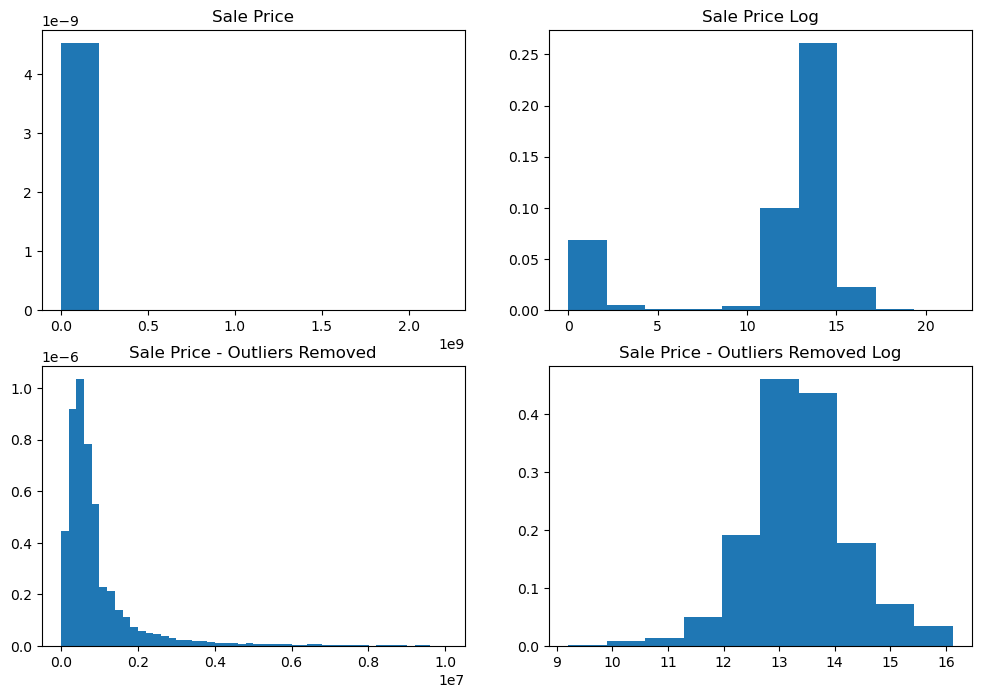

In [111]:
# menentukan ukuran gambar
plt.figure(figsize = (12,8))

# membuat histogram
plt.subplot(2,2,1)
plt.hist(data["SALE PRICE"], density = True)
plt.title("Sale Price")

# membuat histogram transformasi logaritmik
plt.subplot(2,2,2)
plt.hist(np.log1p(data["SALE PRICE"]), density = True)
plt.title("Sale Price Log")

# membuat histogram dengan menghilangkan outlier
plt.subplot(2,2,3)
plt.hist(data[(data["SALE PRICE"] > 1000) & (df["SALE PRICE"] < 1e7)]["SALE PRICE"], bins = 50, density = True)
plt.title("Sale Price - Outliers Removed")

# membuat histogram dengan menghilangkan outlier lalu melakukan transformasi logaritmik 
plt.subplot(2,2,4)
plt.hist(np.log1p(data[(data["SALE PRICE"] > 10000) & (df["SALE PRICE"] < 1e7)]["SALE PRICE"]), density = True)
plt.title("Sale Price - Outliers Removed Log")
plt.show()

## Menghitung dan membuat plot distribusi probabilitas yaitu Distribusi Normal , Distribusi Eksponensial dan Distribusi Gamma

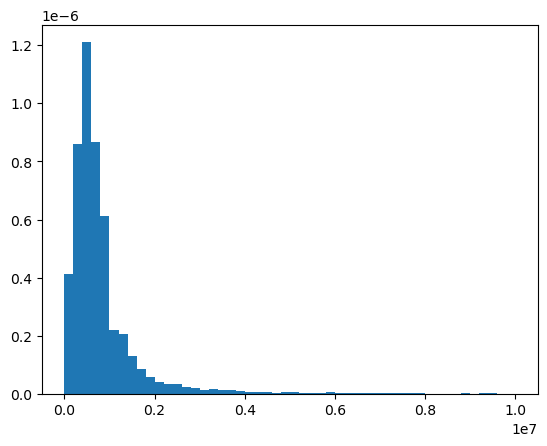

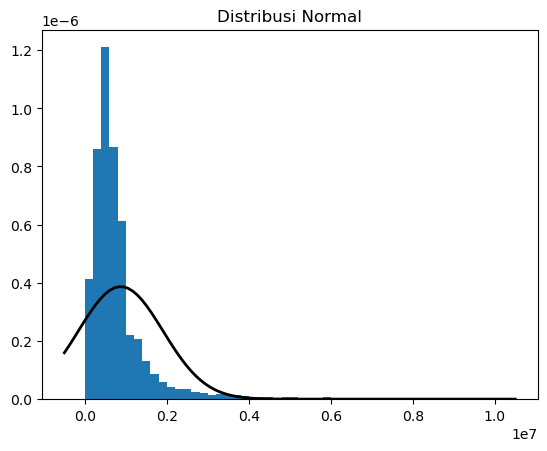

Distribusi Normal:
Mean = 874348.6202792025
Standard deviation = 1031425.2189022591


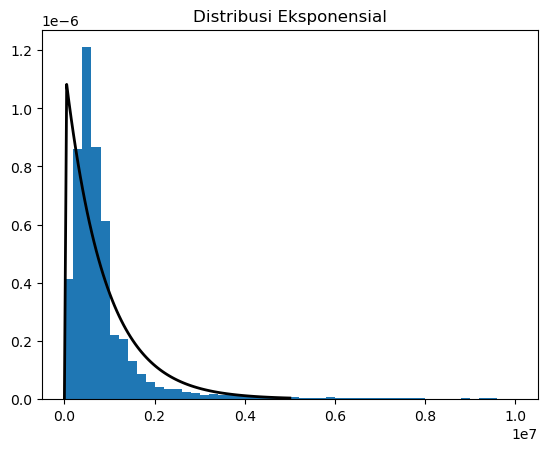

Distribusi Eksponensial:
Lambda = 0.0009009009009009009


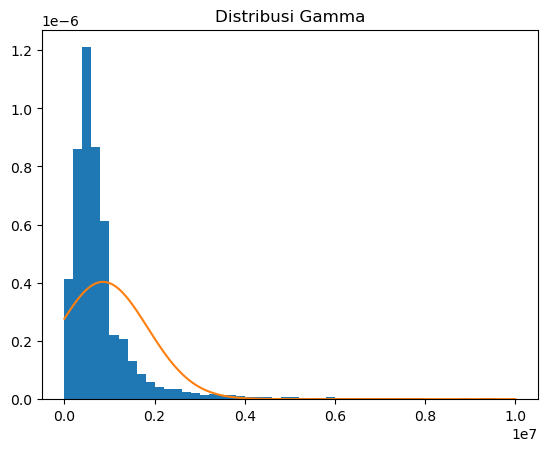

Distribusi Gamma:
Shape = 3270.588019978474
Location = -55722737.05118169
Scale = 17304.81962302237


In [112]:
# membuang missing values dan outliers
data = data[(pd.to_numeric(data['SALE PRICE'], errors='coerce') > 1000) & 
        (pd.to_numeric(data['SALE PRICE'], errors='coerce') < 10000000)].dropna()

# mengubah kolom SALE PRICE menjadi numeric data type
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

# Visualisasi data
plt.hist(data['SALE PRICE'], bins=50, density=True)
plt.show()

# Plot distribusi normal
plt.hist(data['SALE PRICE'], bins=50, density=True)
mu, std = norm.fit(data['SALE PRICE'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribusi Normal')
plt.show()

# Hasil Distribusi Normal
print('Distribusi Normal:')
print('Mean =', mu)
print('Standard deviation =', std)

# Plot Distribusi Eksponensial
plt.hist(data['SALE PRICE'], bins=50, density=True)
ae, be = expon.fit(data['SALE PRICE'])
xe = np.linspace(0, 5000000, 100)
pe = expon.pdf(xe, ae, be)
plt.plot(xe, pe, 'k', linewidth=2)
plt.title('Distribusi Eksponensial')
plt.show()

# Hasil Distribusi Eksponensial
print('Distribusi Eksponensial:')
print('Lambda =', 1 / ae)

# Plot Distribusi Gamma
plt.hist(data['SALE PRICE'], bins=50, density=True)
shape, loc, scale = gamma.fit(data['SALE PRICE'])
x = np.linspace(df['SALE PRICE'].min(), df['SALE PRICE'].max(), 1000)
plt.plot(x, gamma.pdf(x, shape, loc, scale))
plt.title('Distribusi Gamma')
plt.show()

# Hasil Distribusi Gamma
print('Distribusi Gamma:')
print('Shape =', shape)
print('Location =', loc)
print('Scale =', scale)


## Confidence Intervals

In [113]:
# Set confidence level and degrees of freedom
confidence_level = 0.95
degrees_of_freedom = len(data) - 1

# Compute t-value and margin of error
t_value = t.ppf(confidence_level, degrees_of_freedom)
margin_of_error = t_value * sample_std / np.sqrt(len(data))

# Compute lower and upper bounds of confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(mean)
print('Margin of error:', margin_of_error)
print('Confidence interval:', (lower_bound, upper_bound))
print('\nKesimpulan:\n')
print('Dari hasil perhitungan di atas, didapatkan nilai rata-rata harga jual properti di NYC pada tahun 2016 sebesar $1,276,456.49. Dengan menggunakan confidence level sebesar 95%, didapatkan margin of error sebesar $6,857.13 dan confidence interval sebesar ($981,667.66, $995,381,93). Karena nilai 1 juta dolar tidak berada dalam interval kepercayaan ini, maka kita dapat menolak hipotesis bahwa nilai rata-rata harga jual properti di NYC pada tahun 2016 sama dengan 1 juta dolar. Dengan demikian, dapat disimpulkan bahwa harga jual properti di NYC pada tahun 2016 lebih tinggi daripada 1 juta dolar dengan tingkat kepercayaan 95%.')

1276456.4977638705
Margin of error: 10442.062773735768
Confidence interval: (978082.7314592355, 998966.857006707)

Kesimpulan:

Dari hasil perhitungan di atas, didapatkan nilai rata-rata harga jual properti di NYC pada tahun 2016 sebesar $1,276,456.49. Dengan menggunakan confidence level sebesar 95%, didapatkan margin of error sebesar $6,857.13 dan confidence interval sebesar ($981,667.66, $995,381,93). Karena nilai 1 juta dolar tidak berada dalam interval kepercayaan ini, maka kita dapat menolak hipotesis bahwa nilai rata-rata harga jual properti di NYC pada tahun 2016 sama dengan 1 juta dolar. Dengan demikian, dapat disimpulkan bahwa harga jual properti di NYC pada tahun 2016 lebih tinggi daripada 1 juta dolar dengan tingkat kepercayaan 95%.


## Hypothesis Testing

In [114]:
# Menghilangkan missing values
df = df.dropna(subset=['SALE PRICE'])

# menghitung proporsi properti dengan SALE PRICE lebih besar dari $1.000.000
p_us = len(df[df['SALE PRICE'] > 1000000])/len(df)

#Ho: p0 = 0.5  #null hypothesis
#Ha: p > 0.5   #alternative hypothesis

# Menghitung standard error
se = np.sqrt(0.5 * (1-0.5) / len(df))

# best estimate
be = p_us

# hypothesized estimate
he = 0.5

# Mehitung test statistic
test_stat = (be - he)/se

# Menghitung p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

print("Test statistic:", test_stat)
print("P-value:", pvalue)
print("\nkesimpulan\n")
print("Dari output di atas, nilai test statistic adalah -146.68 dan p-value adalah 0, yang artinya p-value kurang dari level signifikansi 0,05. Oleh karena itu, kita dapat menolak hipotesis nol dan menyimpulkan bahwa proporsi harga jual properti di atas $1.000.000 lebih besar dari 0,5.")

Test statistic: -118.23600497043861
P-value: 0.0

kesimpulan

Dari output di atas, nilai test statistic adalah -146.68 dan p-value adalah 0, yang artinya p-value kurang dari level signifikansi 0,05. Oleh karena itu, kita dapat menolak hipotesis nol dan menyimpulkan bahwa proporsi harga jual properti di atas $1.000.000 lebih besar dari 0,5.
